# Ballot Measures Funding Local Government
This data set shows the success rate of local government funding measures across the state of Wahsington from 2011-2017. The goal of this research is to find patterns in what voters are willing to approove to expand local government in light of property tax caps in state law.

## Descriptive Statistics
Before any analysis is possible, we have to understand the general patterns in the data.

In [1]:
import pandas as pd

In [2]:
data= 'https://github.com/nbennett4025/Data/raw/master/ballotinitiativesWA.xlsx'

In [3]:
ballot=pd.read_excel(data,0)
ballot.dtypes

Jurisdiction                         object
County                               object
Government Type                      object
Subject                              object
Ballot Measure Text                  object
Election Results                     object
Yes %                               float64
No %                                float64
Election Month                       object
Election Year                         int64
Duration in Years Levy/Fee           object
Amount of Levy (Per $1000 A/V)      float64
Tax Amount                          float64
Bond Amount                         float64
Funding Type/Statutory Authority     object
dtype: object

In [4]:
ballotyes=ballot['Yes %']

To understand the data it is important to know that it takes a majority vote to raise taxes in a district. As the table below shows, less than 25% of measures fail.

In [5]:
ballotyes.describe()

count    1434.000000
mean       62.784426
std        14.206475
min         0.000000
25%        54.750000
50%        64.575000
75%        72.442500
max       100.000000
Name: Yes %, dtype: float64

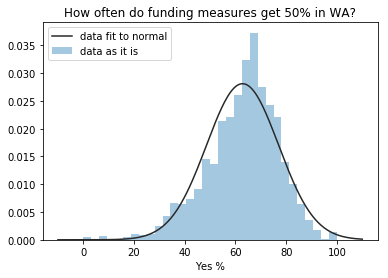

In [6]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(ballotyes.dropna(),kde=False,fit=norm)
plt.legend(('data fit to normal','data as it is'))
plt.title('How often do funding measures get 50% in WA?')
plt.show()

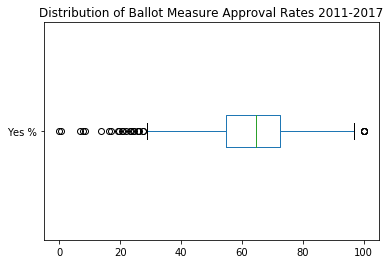

In [7]:
plot,dataBP=ballotyes.plot.box(vert=False,return_type='both')
plt.title('Distribution of Ballot Measure Approval Rates 2011-2017')
plt.show()
#looks like the data have a longer left tail, but are generally close to being 
#'normal'. On average it seems like things get the required 60% about
# a little more than half of the time

In [8]:
#Moving on to bi-variate analysis
from scipy import stats

## Breakdown by government type, timing, and Subject
There are a lot of different governments captured within the data. To facilitate analysis we can simplify the large number of categories into three big ones: cities, counties, and various special purpose governments. Counties, which proivde both regional and local services, have the most difficult time getting funding approved.

In [9]:
ballot['Government Type'].value_counts()

City                                      481
Fire Protection District                  425
Park District                             161
County                                    110
Cemetery District                          60
Public Hospital District                   58
Transportation Benefit District            40
Port District                              20
Emergency Medical Services District        16
Water-Sewer District                       14
Public Transportation Benefit Area         13
Library District                           13
Public Facilities District                  7
Solid Waste Disposal District               6
Mosquito Control District                   4
Public Utility District                     2
County Public Transportation Authority      2
Flood Control Zone District                 1
Regional Transit Authority                  1
Name: Government Type, dtype: int64

In [10]:
values = list(ballot['Government Type'].value_counts().index)
values    

['City',
 'Fire Protection District',
 'Park District',
 'County',
 'Cemetery District',
 'Public Hospital District',
 'Transportation Benefit District',
 'Port District',
 'Emergency Medical Services District',
 'Water-Sewer District',
 'Public Transportation Benefit Area',
 'Library District',
 'Public Facilities District',
 'Solid Waste Disposal District',
 'Mosquito Control District',
 'Public Utility District',
 'County Public Transportation Authority',
 'Flood Control Zone District',
 'Regional Transit Authority']

In [11]:
city = values[0]
county = values[3]
govsimple = []

for value in ballot['Government Type']:
    if value in city:
        govsimple.append('City')
    else:
        if value in county:
            govsimple.append('County')
        else:
            govsimple.append('Special District')
    

In [12]:
ballot['govsimple'] = govsimple

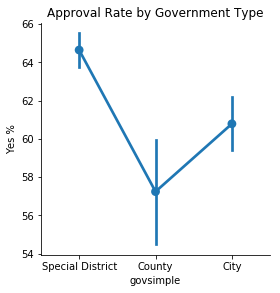

In [13]:
sns.factorplot(x='govsimple', y= 'Yes %', data=ballot)
plt.title('Approval Rate by Government Type')
plt.show()

For election timing it seems that any non-November election is more likely to yield positive results. The year seems not to yield any predictable pattern.

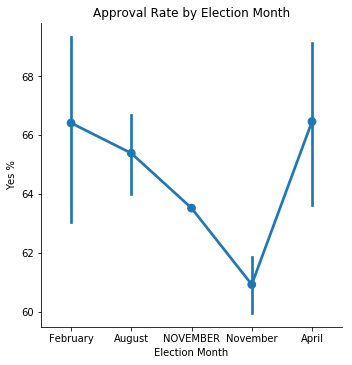

In [14]:
# it would seem that counties have a harder time passing funding than cities
# or special districts
#Does the month of the election matter?
sns.factorplot(x='Election Month', y= 'Yes %', data=ballot, size=5)
plt.title('Approval Rate by Election Month')
plt.show()

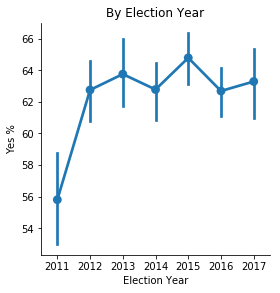

In [15]:
sns.factorplot(x='Election Year', y= 'Yes %', data=ballot)
plt.title('By Election Year')
plt.show()
#looks like 2011 was a bad year for funding

In [16]:
#looking a little closer
ballot['Election Year'].value_counts()

2016    252
2015    247
2017    213
2013    211
2012    205
2014    195
2011    111
Name: Election Year, dtype: int64

Like government type, subject matter of the ballot measure needs to be simplified.

In [17]:
import numpy as np
subjects = list(ballot['Subject'].value_counts().index)
subjects

['EMS',
 'Parks and Recreation',
 'Fire',
 'Transportation',
 'Other',
 'Government Organization',
 'Fire, EMS',
 'Cemetery',
 'Criminal Justice',
 'Hospital',
 'Annexation, Fire',
 'Library',
 'Water and Sewer',
 'Annexation',
 'Criminal Justice, Fire',
 'Annexation, Library',
 'Transportation, Water and Sewer, Other',
 'Government Organization, Fire',
 'Affordable Housing',
 'Criminal Justice, Other',
 'Annexation, Transportation',
 'Transportation, Criminal Justice',
 'Human Services',
 'Criminal Justice, Fire, Parks and Recreation, Other',
 'Fire, Other',
 'Parks and Recreation, Other',
 'Fire, EMS, Criminal Justice',
 'Transportation, Parks and Recreation',
 'Criminal Justice, Parks and Recreation, Other',
 'Fire, Parks and Recreation, Other',
 'Government Organization, Other',
 'Transportation, Other',
 'Criminal Justice, Fire, Parks and Recreation, Transportation, Other',
 'Fire, EMS, Transportation, Parks and Recreation, Criminal Justice',
 'Government Organization, Criminal Ju

In [18]:
parks = subjects[1]
transit = subjects[3]
govorg =subjects[5]
cemetery=subjects[7]
other=subjects[4]
water=subjects[12]
publicsafety = ['EMS', 'Fire', 'Fire, EMS', 'Criminal Justice']
human = ['Hospital', 'Library', 'Affordable Housing', 'Human Services']
annexation = ['Annexation, Fire', 'Annexation', 'Annexation, Library', 'Annexation, Transportation', 'Annexation, Water-Sewer']





In [19]:
parks

'Parks and Recreation'

In [20]:
subsimple = []
for value in ballot['Subject']:
    if value in parks:
        subsimple.append('Parks')
    else:
        if value in transit:
            subsimple.append('Transit')
        else:
            if value in govorg:
                subsimple.append('Government Organization')
            else: 
                if value in cemetery:
                    subsimple.append('Cemetery')
                else:
                    if value in water:
                        subsimple.append('Water/Sewer')
                    else:
                        if value in other:
                            subsimple.append('Other')
                        else:
                            if value in publicsafety:
                                subsimple.append('Public Safety')
                            else:
                                if value in human:
                                    subsimple.append('Human Services')
                                else:
                                    if value in annexation:
                                        subsimple.append('Annexation')
                                    else:
                                        subsimple.append('Multiple')
                                
                            


In [21]:
ballot['subsimple'] = subsimple

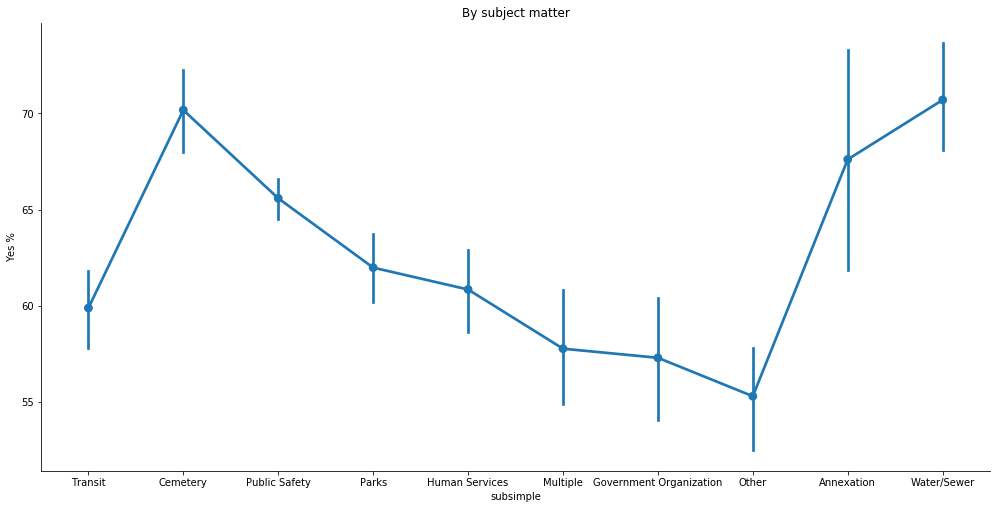

In [22]:
sns.factorplot(x='subsimple', y= 'Yes %', data=ballot,size=7, aspect=2)
plt.title('By subject matter')
plt.show()

## Correlation and Regression Analysis

In [23]:
#time for some correlations
ballot.dtypes

Jurisdiction                         object
County                               object
Government Type                      object
Subject                              object
Ballot Measure Text                  object
Election Results                     object
Yes %                               float64
No %                                float64
Election Month                       object
Election Year                         int64
Duration in Years Levy/Fee           object
Amount of Levy (Per $1000 A/V)      float64
Tax Amount                          float64
Bond Amount                         float64
Funding Type/Statutory Authority     object
govsimple                            object
subsimple                            object
dtype: object

In [24]:
yes = ballot['Yes %']
no = ballot['No %']
duration = ballot['Duration in Years Levy/Fee']
levy = ballot['Amount of Levy (Per $1000 A/V)']
tax = ballot['Tax Amount']
bond = ballot['Bond Amount']

In [25]:
data={'yes':yes, 'no':no, 'duration':duration, 'levy':levy, 'tax':tax, 'bond':bond}

In [26]:
ballotcorr = pd.DataFrame.from_dict(data)

In [27]:
#looks like duration is going to be a problem so lets drop it as a variable
ballotcorr.drop('duration',axis=1,inplace=True)

In [28]:
ballotcorr.corr('pearson', 1)

,bond,levy,no,tax,yes
bond,1.000000,NaN,-0.075546,NaN,0.075543
levy,NaN,1.000000,0.141061,-1.000000,-0.137931
no,-0.075546,0.141061,1.000000,-0.254060,-0.979699
tax,NaN,-1.000000,-0.254060,1.000000,0.254068
yes,0.075543,-0.137931,-0.979699,0.254068,1.000000


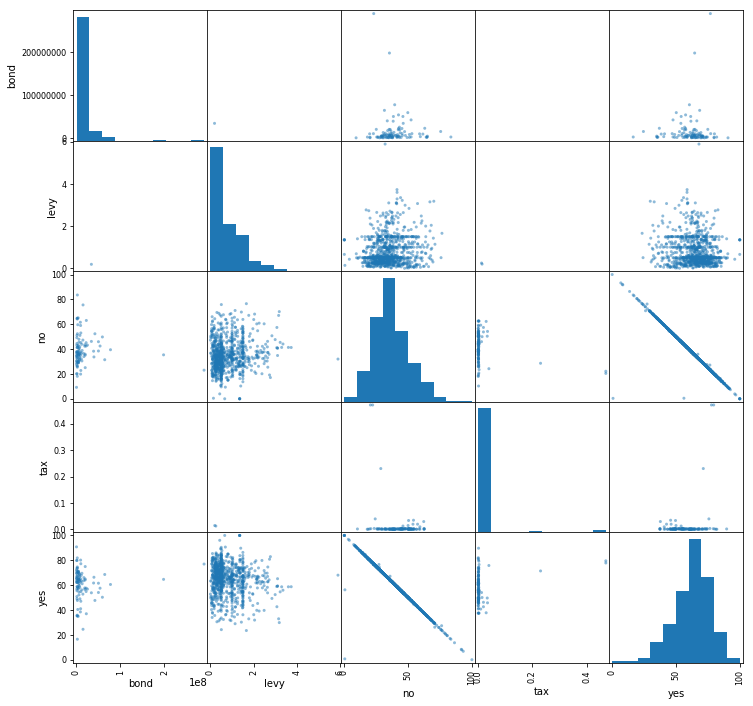

In [29]:
pd.plotting.scatter_matrix(ballotcorr,figsize=(12,12))
plt.show()

In [30]:
# alright it looks like only certain types of funding respond at all to the amount being asked for

In [31]:
#in order to have a good regression we need to turn some variables into dummy variables

In [32]:
ballot['Subject'].value_counts()

EMS                                                                    214
Parks and Recreation                                                   200
Fire                                                                   190
Transportation                                                         134
Other                                                                  117
Government Organization                                                115
Fire, EMS                                                              114
Cemetery                                                                60
Criminal Justice                                                        55
Hospital                                                                44
Annexation, Fire                                                        32
Library                                                                 32
Water and Sewer                                                         23
Annexation               

In [33]:
ballot['subsimple'].value_counts()

Public Safety              573
Parks                      200
Transit                    134
Other                      117
Government Organization    115
Human Services              84
Annexation                  64
Multiple                    64
Cemetery                    60
Water/Sewer                 23
Name: subsimple, dtype: int64

In [34]:
#dummy recodes
#1 - election month
months = list(ballot['Election Month'].value_counts().index)
months

['November', 'August', 'February', 'April', 'NOVEMBER']

In [35]:
november = months[0]
august = months[1]
february = months[2]
april = months[3]
novembercap = months[4]

isnovember = []
for value in ballot['Election Month']:
    if value in november or novembercap:
        isnovember.append(1)
    else:
        isnovember.append(0)

ballot['isnovember'] = isnovember

isaugust =[]
for value in ballot['Election Month']:
    if value in august:
        isaugust.append(1)
    else:
        isaugust.append(0)

ballot['isaugust'] = isaugust

isfebruary =[]
for value in ballot['Election Month']:
    if value in february:
        isfebruary.append(1)
    else:
        isfebruary.append(0)

ballot['isfebruary'] = isfebruary

isapril =[]
for value in ballot['Election Month']:
    if value in april:
        isapril.append(1)
    else:
        isapril.append(0)

ballot['isapril'] = isapril

In [36]:
#recoding election results as a dummy variable
result = list(ballot['Election Results'].value_counts().index)
result


['Passed', 'Failed', 'Advisory']

In [37]:
passing=result[0]
failing=result[1]
passed=[]
for value in ballot['Election Results']:
    if value in passing:
        passed.append(1)
    else:
        if value in failing:
            passed.append(0)
        else:
            passed.append(None)
            
ballot['passed']=passed


In [38]:
ballot['levy']=ballot['Amount of Levy (Per $1000 A/V)']
ballot['salestax'] = ballot['Tax Amount']
ballot['bondamt'] = ballot['Bond Amount']

In [39]:
ballot.dtypes

Jurisdiction                         object
County                               object
Government Type                      object
Subject                              object
Ballot Measure Text                  object
Election Results                     object
Yes %                               float64
No %                                float64
Election Month                       object
Election Year                         int64
Duration in Years Levy/Fee           object
Amount of Levy (Per $1000 A/V)      float64
Tax Amount                          float64
Bond Amount                         float64
Funding Type/Statutory Authority     object
govsimple                            object
subsimple                            object
isnovember                            int64
isaugust                              int64
isfebruary                            int64
isapril                               int64
passed                              float64
levy                            

In [40]:
#now that the relavent variables are ready lets see if the x's are correlated
xvars = ballot.columns[[19,20,21,22,23,24]]
ballot[xvars].corr()

,isfebruary,isapril,passed,levy,salestax,bondamt
isfebruary,1.000000,-0.084309,0.069492,0.036321,-0.046923,-0.081322
isapril,-0.084309,1.000000,0.034492,-0.071166,0.367510,0.117694
passed,0.069492,0.034492,1.000000,-0.061768,0.079036,0.052004
levy,0.036321,-0.071166,-0.061768,1.000000,-1.000000,NaN
salestax,-0.046923,0.367510,0.079036,-1.000000,1.000000,NaN
bondamt,-0.081322,0.117694,0.052004,NaN,NaN,1.000000


In [41]:
#looks like we are in the clear, lets run the regression on 'passed'
import statsmodels.formula.api as smf
formulalevy='passed ~ levy + isaugust + isfebruary + isapril + subsimple + govsimple'
levylogit = smf.ols(formulalevy,data=ballot).fit()
print(levylogit.summary())

                            OLS Regression Results                            
Dep. Variable:                 passed   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     4.740
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           1.97e-08
Time:                        10:49:31   Log-Likelihood:                -392.98
No. Observations:                 887   AIC:                             816.0
Df Residuals:                     872   BIC:                             887.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [42]:
import statsmodels.formula.api as smf
formulasales='passed ~ salestax + isaugust + isfebruary + isapril + subsimple + govsimple'
saleslogit = smf.ols(formulasales,data=ballot).fit()
print(saleslogit.summary())

                            OLS Regression Results                            
Dep. Variable:                 passed   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.148
Date:                Thu, 15 Mar 2018   Prob (F-statistic):              0.330
Time:                        10:49:33   Log-Likelihood:                -72.679
No. Observations:                 124   AIC:                             171.4
Df Residuals:                     111   BIC:                             208.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [43]:
import statsmodels.formula.api as smf
formulabond='passed ~ bondamt + isaugust + isfebruary + isapril + subsimple + govsimple'
bondlogit = smf.ols(formulabond,data=ballot).fit()
print(bondlogit.summary())

                            OLS Regression Results                            
Dep. Variable:                 passed   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.344
Date:                Thu, 15 Mar 2018   Prob (F-statistic):              0.219
Time:                        10:49:36   Log-Likelihood:                -64.042
No. Observations:                 101   AIC:                             150.1
Df Residuals:                      90   BIC:                             178.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [44]:
#Moving along to clustering
#first step is to find a unique unit
len(ballot['Ballot Measure Text'].unique())==len(ballot['Ballot Measure Text'])

False

In [45]:
import geopandas as gpd

In [46]:
#to download this shp file go to https://github.com/nbennett4025/Data/blob/master/WAOFM.zip
compressedmap = 'C:/Users/benne/Desktop/govproject/govproject/shape.shp'

In [47]:
countymap =gpd.GeoDataFrame.from_file(compressedmap)

In [48]:
countymap.head()

,countyfp,name,geometry
0,001,Adams,POLYGON ((-118.9825480580862 46.91134733328905...
1,003,Asotin,POLYGON ((-117.4196632992044 46.27754321148509...
2,005,Benton,POLYGON ((-119.8654444991138 46.12714840917387...
3,007,Chelan,POLYGON ((-120.9464421249536 47.47252236561713...
4,009,Clallam,POLYGON ((-123.5206495706549 48.22911230114539...


In [49]:
countymap.name.dtype

dtype('O')

In [50]:
ballot.County.dtype

dtype('O')

In [51]:
mergedmap=countymap.merge(ballot, left_on='name', right_on='County')
mergedmap

,countyfp,name,geometry,Jurisdiction,County,Government Type,Subject,Ballot Measure Text,Election Results,Yes %,...,govsimple,subsimple,isnovember,isaugust,isfebruary,isapril,passed,levy,salestax,bondamt
0,001,Adams,POLYGON ((-118.9825480580862 46.91134733328905...,Adams County Cemetery District No. 1 - Washtuc...,Adams,Cemetery District,Cemetery,Excess levy ($0.21) for cemetery maintenance a...,Passed,76.84,...,Special District,Cemetery,1,1,0,0,1.0,0.21,NaN,NaN
1,001,Adams,POLYGON ((-118.9825480580862 46.91134733328905...,Adams County Cemetery District No. 1 - Washtuc...,Adams,Cemetery District,Cemetery,Excess levy ($0.27) for cemetery maintenance a...,Passed,70.97,...,Special District,Cemetery,1,1,0,0,1.0,0.27,NaN,NaN
2,001,Adams,POLYGON ((-118.9825480580862 46.91134733328905...,Adams County Cemetery District No. 1 - Washtuc...,Adams,Cemetery District,Cemetery,Excess levy ($0.27) for cemetery maintenance a...,Passed,85.22,...,Special District,Cemetery,1,1,0,0,1.0,0.27,NaN,NaN
3,001,Adams,POLYGON ((-118.9825480580862 46.91134733328905...,Adams County Cemetery District No. 1 - Washtuc...,Adams,Cemetery District,Cemetery,Excess levy ($0.19) for cemetery maintenance a...,Passed,81.82,...,Special District,Cemetery,1,1,0,0,1.0,0.19,NaN,NaN
4,001,Adams,POLYGON ((-118.9825480580862 46.91134733328905...,Adams County Cemetery District No. 1 - Washtuc...,Adams,Cemetery District,Cemetery,Excess levy ($0.26) for cemetery maintenance a...,Passed,85.94,...,Special District,Cemetery,1,1,0,0,1.0,0.26,NaN,NaN
5,001,Adams,POLYGON ((-118.9825480580862 46.91134733328905...,Adams County Cemetery District No. 1 - Washtuc...,Adams,Cemetery District,Cemetery,Excess levy ($0.26) for cemetery maintenance a...,Passed,84.70,...,Special District,Cemetery,1,1,0,0,1.0,0.26,NaN,NaN
6,001,Adams,POLYGON ((-118.9825480580862 46.91134733328905...,Adams County Cemetery District No. 2 - Othello,Adams,Cemetery District,Cemetery,Excess levy ($0.02) for cemetery maintenance a...,Failed,63.52,...,Special District,Cemetery,1,0,0,0,0.0,0.02,NaN,NaN
7,001,Adams,POLYGON ((-118.9825480580862 46.91134733328905...,Adams County Cemetery District No. 2 - Othello,Adams,Cemetery District,Cemetery,Excess levy ($0.02) for cemetery maintenance a...,Failed,50.86,...,Special District,Cemetery,1,0,0,0,0.0,0.02,NaN,NaN
8,001,Adams,POLYGON ((-118.9825480580862 46.91134733328905...,Adams County Cemetery District No. 3 - Lind Ce...,Adams,Cemetery District,Cemetery,Excess levy ($0.11) for cemetery maintenance a...,Failed,57.62,...,Special District,Cemetery,1,0,0,0,0.0,0.11,NaN,NaN
9,001,Adams,POLYGON ((-118.9825480580862 46.91134733328905...,Adams County Cemetery District No. 3 - Lind Ce...,Adams,Cemetery District,Cemetery,Excess levy ($0.12) for cemetery maintenance a...,Passed,61.12,...,Special District,Cemetery,1,0,0,0,1.0,0.12,NaN,NaN


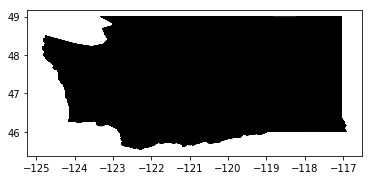

In [52]:
#Lets ensure that all the counties are represented in the data set
%matplotlib inline
base = mergedmap.plot(color='black')
#looks good

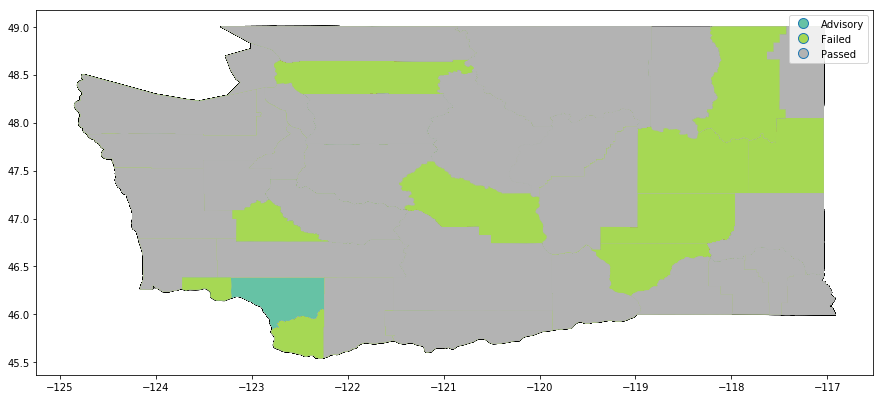

In [58]:
base = mergedmap.plot(color='black',figsize=(15,13),edgecolor='black')
mergedmap.plot(ax=base, column='Election Results', cmap='Set2', categorical=True,legend = True)

In [ ]:
#ok that is good, but it doesnt show us the intensity level of failures
#Disclaimer: I used a pivot table in excel to find the number of failures
#in each county that have had measures fail.
